/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


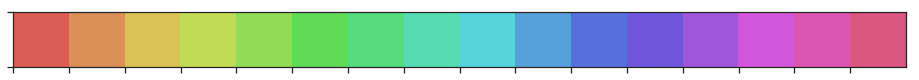

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import LineObject as dline
from peak import LineObject as pline
from plotter import Plotter

sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[15]]
fivep_density_colors = [colors[8], colors[9]]


In [2]:
density_dir = '/projects/ps-yeolab3/bay001/maps/current/se_zscore'

"""density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')
"""

density_included = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.U2AF2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.U2AF2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')



In [3]:
density_5p_dir = '/projects/ps-yeolab3/bay001/maps/current/se_5p/'

"""density_included_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')
"""

density_included_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.U2AF2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.U2AF2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')


In [4]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
density_incl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_included_5p, sep=',', index_col=0),
    annotation='Included upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[0], # blueish
    min_event_threshold=1000000
)
density_excl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_excluded_5p, sep=',', index_col=0),
    annotation='Excluded upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[1], # reddish
    min_event_threshold=1000000
)

((796, 1400), 'Included upon knockdown (796 events)')
((2285, 1400), 'Excluded upon knockdown (2285 events)')
((796, 1400), 'Included upon knockdown (5p) (796 events)')
((2285, 1400), 'Excluded upon knockdown (5p) (2285 events)')


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


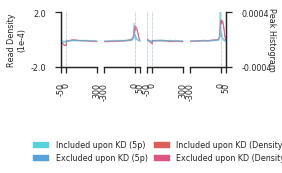

In [5]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(4*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 4, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[0, 1:4])

read_map_regions = []
peak_map_regions = []

for i in range(4):
    read_map_regions.append(plt.subplot(map_row[i:i+1]))
    peak_map_regions.append(read_map_regions[i].twinx())

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)
read_plotter = Plotter._SEPlotter(lines=[density_incl_5p, density_excl_5p], num_regions=4)
peak_map_regions = read_plotter.plot(peak_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[0].set_ylabel("Read Density\n(1e-4)", size=FONTSIZE)
read_map_regions[0].yaxis.set_visible(True)
read_map_regions[3].yaxis.set_visible(False)

peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[3].yaxis.set_visible(True)
peak_map_regions[3].set_ylabel("Peak Histogram", rotation=270, size=FONTSIZE)
peak_map_regions[3].yaxis.tick_right()

read_ymin = -0.002
read_ymax = 0.002
peak_ymin = -0.0004
peak_ymax = 0.0004

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(peak_ymin, peak_ymax)

read_map_regions[0].yaxis.set_ticks([read_ymin, read_ymax])
read_map_regions[0].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
peak_map_regions[3].yaxis.set_ticks([peak_ymin, peak_ymax])
peak_map_regions[3].yaxis.set_ticklabels([peak_ymin, peak_ymax])

sns.despine(ax=read_map_regions[0], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False)

# despine stuff
for region in read_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)
    
for region in peak_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)

sns.despine(ax=peak_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[3], top=True, left=True, right=False, bottom=False)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False, bottom=False)


incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')
incl_peak_patch = mpatches.Patch(color=fivep_density_colors[0], label='Included upon KD (5p)')
excl_peak_patch = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (5p)')

leg = read_map_regions[0].legend(
    bbox_to_anchor=(2.5, -1.3), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_peak_patch, excl_peak_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
output_file = '/home/bay001/projects/gabe_qc_20170612/analysis/272_01_U2AF2_whole_vs_5p_read_density.svg'
fig.savefig(output_file)

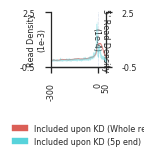

In [16]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(1*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 1, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=full_grid[0, 0])

read_map_regions = [plt.subplot()]*4
peak_map_regions = [plt.subplot()]*4

read_map_regions[1] = (plt.subplot(map_row[0]))
peak_map_regions[1] = (read_map_regions[0].twinx())

density_plotter = Plotter._SEPlotter(lines=[density_incl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)
read_plotter = Plotter._SEPlotter(lines=[density_incl_5p], num_regions=4)
peak_map_regions = read_plotter.plot(peak_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[1].set_ylabel("Read Density\n(1e-3)", size=FONTSIZE)
read_map_regions[1].yaxis.set_visible(True)
# read_map_regions[3].yaxis.set_visible(False)

# peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[1].yaxis.set_visible(True)
peak_map_regions[1].set_ylabel("5' Read Density\n(1e-4)", rotation=270, size=FONTSIZE)
peak_map_regions[1].yaxis.tick_right()

read_ymin = -0.0005
read_ymax = 0.0025
peak_ymin = -0.00005
peak_ymax = 0.00025

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(peak_ymin, peak_ymax)

read_map_regions[1].yaxis.set_ticks([read_ymin, read_ymax])
read_map_regions[1].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
peak_map_regions[1].yaxis.set_ticks([peak_ymin, peak_ymax])
peak_map_regions[1].yaxis.set_ticklabels([peak_ymin*10000, peak_ymax*10000])

sns.despine(ax=read_map_regions[1], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[1], top=True, left=True, right=False)


sns.despine(ax=peak_map_regions[1], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[1], top=True, left=True, right=False, bottom=False)


incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Whole read)')
# excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')
incl_peak_patch = mpatches.Patch(color=fivep_density_colors[0], label='Included upon KD (5p end)')
# excl_peak_patch = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (Peak)')

leg = read_map_regions[1].legend(
    bbox_to_anchor=(-0.75,-1.25), loc=10, mode="expand",
    handles=[incl_density_patch, incl_peak_patch],
    borderaxespad=0., ncol=1, fontsize=FONTSIZE
)
output_file = '/home/bay001/projects/gabe_qc_20170612/scratch/272_01_U2AF2_whole_vs_5p_read_density.1pane.svg'
fig.savefig(output_file)

# 11/14 changes - decrease window 300nt to 50nt

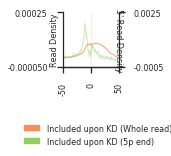

In [20]:
density_incl.color = '#fc8d59'
density_incl_5p.color = '#91cf60'

FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(1*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 1, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=full_grid[0, 0])

read_map_regions = [plt.subplot()]*4
peak_map_regions = [plt.subplot()]*4

read_map_regions[1] = (plt.subplot(map_row[0]))
peak_map_regions[1] = (read_map_regions[0].twinx())

density_plotter = Plotter._SEPlotter(lines=[density_incl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)
read_plotter = Plotter._SEPlotter(lines=[density_incl_5p], num_regions=4)
peak_map_regions = read_plotter.plot(peak_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[1].set_ylabel("Read Density", size=FONTSIZE)
read_map_regions[1].yaxis.set_visible(True)
# read_map_regions[3].yaxis.set_visible(False)

# peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[1].yaxis.set_visible(True)
peak_map_regions[1].set_ylabel("5' Read Density", rotation=270, size=FONTSIZE)
peak_map_regions[1].yaxis.tick_right()

read_ymin = -0.0005
read_ymax = 0.0025
peak_ymin = -0.00005
peak_ymax = 0.00025

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(peak_ymin, peak_ymax)

read_map_regions[1].yaxis.set_ticks([read_ymin, read_ymax])
read_map_regions[1].yaxis.set_ticklabels([read_ymin, read_ymax])
# read_map_regions[1].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
peak_map_regions[1].yaxis.set_ticks([peak_ymin, peak_ymax])
peak_map_regions[1].yaxis.set_ticklabels(["{:04f}".format(peak_ymin), peak_ymax])
# peak_map_regions[1].yaxis.set_ticklabels([peak_ymin*10000, peak_ymax*10000])

sns.despine(ax=read_map_regions[1], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[1], top=True, left=True, right=False)


sns.despine(ax=peak_map_regions[1], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[1], top=True, left=True, right=False, bottom=False)


incl_density_patch = mpatches.Patch(color=density_incl.color, label='Included upon KD (Whole read)')
# excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')
incl_peak_patch = mpatches.Patch(color=density_incl_5p.color, label='Included upon KD (5p end)')
# excl_peak_patch = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (Peak)')

leg = read_map_regions[1].legend(
    bbox_to_anchor=(-0.75,-1.25), loc=10, mode="expand",
    handles=[incl_density_patch, incl_peak_patch],
    borderaxespad=0., ncol=1, fontsize=FONTSIZE
)

read_map_regions[1].set_xlim(250,350)
peak_map_regions[1].set_xlim(250,350)
read_map_regions[1].set_xticks([250, 300, 350])
read_map_regions[1].set_xticklabels(['-50','0','50'])

output_file = '/home/bay001/projects/gabe_qc_20170612/analysis/272_01_U2AF2_whole_vs_5p_read_density.1pane.zoomed.svg'
fig.savefig(output_file)

# 11/14 Make maps for TRA2A

In [8]:
density_included = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')


In [9]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
density_incl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_included_5p, sep=',', index_col=0),
    annotation='Included upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[0], # blueish
    min_event_threshold=1000000
)
density_excl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_excluded_5p, sep=',', index_col=0),
    annotation='Excluded upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[1], # reddish
    min_event_threshold=1000000
)

((22, 1400), 'Included upon knockdown (22 events)')
((15, 1400), 'Excluded upon knockdown (15 events)')
((22, 1400), 'Included upon knockdown (5p) (22 events)')
((15, 1400), 'Excluded upon knockdown (5p) (15 events)')


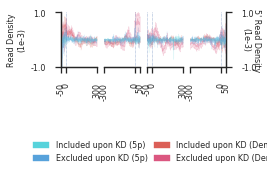

In [15]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(4*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 4, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[0, 1:4])

read_map_regions = []
peak_map_regions = []

for i in range(4):
    read_map_regions.append(plt.subplot(map_row[i:i+1]))
    peak_map_regions.append(read_map_regions[i].twinx())

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)
read_plotter = Plotter._SEPlotter(lines=[density_incl_5p, density_excl_5p], num_regions=4)
peak_map_regions = read_plotter.plot(peak_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[0].set_ylabel("Read Density\n(1e-3)", size=FONTSIZE)
read_map_regions[0].yaxis.set_visible(True)
read_map_regions[3].yaxis.set_visible(False)

peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[3].yaxis.set_visible(True)
peak_map_regions[3].set_ylabel("5' Read Density\n(1e-3)", rotation=270, size=FONTSIZE)
peak_map_regions[3].yaxis.tick_right()

read_ymin = -0.001
read_ymax = 0.001
peak_ymin = -0.001
peak_ymax = 0.001

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(peak_ymin, peak_ymax)

read_map_regions[0].yaxis.set_ticks([read_ymin, read_ymax])
read_map_regions[0].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
peak_map_regions[3].yaxis.set_ticks([peak_ymin, peak_ymax])
peak_map_regions[3].yaxis.set_ticklabels([peak_ymin*1000, peak_ymax*1000])

sns.despine(ax=read_map_regions[0], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False)

# despine stuff
for region in read_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)
    
for region in peak_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)

sns.despine(ax=peak_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[3], top=True, left=True, right=False, bottom=False)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False, bottom=False)


incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')
incl_peak_patch = mpatches.Patch(color=fivep_density_colors[0], label='Included upon KD (5p)')
excl_peak_patch = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (5p)')

leg = read_map_regions[0].legend(
    bbox_to_anchor=(2.5, -1.3), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_peak_patch, excl_peak_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
output_file = '/home/bay001/projects/gabe_qc_20170612/analysis/218_01_TRA2A_whole_vs_5p_read_density.svg'
fig.savefig(output_file)

# 11/20 Make this for RBFOX2

In [21]:
density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')


In [22]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
density_incl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_included_5p, sep=',', index_col=0),
    annotation='Included upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[0], # blueish
    min_event_threshold=1000000
)
density_excl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_excluded_5p, sep=',', index_col=0),
    annotation='Excluded upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[1], # reddish
    min_event_threshold=1000000
)

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')
((113, 1400), 'Included upon knockdown (5p) (113 events)')
((138, 1400), 'Excluded upon knockdown (5p) (138 events)')


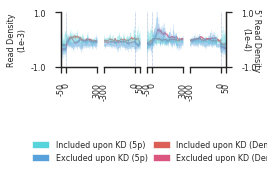

In [27]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(4*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 4, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[0, 1:4])

read_map_regions = []
peak_map_regions = []

for i in range(4):
    read_map_regions.append(plt.subplot(map_row[i:i+1]))
    peak_map_regions.append(read_map_regions[i].twinx())

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)
read_plotter = Plotter._SEPlotter(lines=[density_incl_5p, density_excl_5p], num_regions=4)
peak_map_regions = read_plotter.plot(peak_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[0].set_ylabel("Read Density\n(1e-3)", size=FONTSIZE)
read_map_regions[0].yaxis.set_visible(True)
read_map_regions[3].yaxis.set_visible(False)

peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[3].yaxis.set_visible(True)
peak_map_regions[3].set_ylabel("5' Read Density\n(1e-4)", rotation=270, size=FONTSIZE)
peak_map_regions[3].yaxis.tick_right()

read_ymin = -0.001
read_ymax = 0.001
peak_ymin = -0.0001
peak_ymax = 0.0001

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(peak_ymin, peak_ymax)

read_map_regions[0].yaxis.set_ticks([read_ymin, read_ymax])
read_map_regions[0].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
peak_map_regions[3].yaxis.set_ticks([peak_ymin, peak_ymax])
peak_map_regions[3].yaxis.set_ticklabels([peak_ymin*10000, peak_ymax*10000])

sns.despine(ax=read_map_regions[0], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False)

# despine stuff
for region in read_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)
    
for region in peak_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)

sns.despine(ax=peak_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[3], top=True, left=True, right=False, bottom=False)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False, bottom=False)


incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')
incl_peak_patch = mpatches.Patch(color=fivep_density_colors[0], label='Included upon KD (5p)')
excl_peak_patch = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (5p)')

leg = read_map_regions[0].legend(
    bbox_to_anchor=(2.5, -1.3), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_peak_patch, excl_peak_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
output_file = '/home/bay001/projects/gabe_qc_20170612/analysis/204_01_RBFOX2_whole_vs_5p_read_density.svg'
fig.savefig(output_file)